<a href="https://colab.research.google.com/github/Yoshibansal/ML-basics/blob/main/Fashion_MNIST-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fashion MNIST (Multi class classifier) (part 2)

Learned how to do classificaiton using Fashion MNIST, a data set containing items of clothing. There's another, similar dataset called MNIST which has items of handwriting -- the digits 0 through 9.

Each example is a 28x28 grayscale image, associated with a label from 10 classes.

In [1]:
#importing tesnorflow

import tensorflow as tf
print(tf.__version__)

2.3.0


In [2]:
#load module fashion_mnist from tensorflow
mnist = tf.keras.datasets.fashion_mnist

In [3]:
#loading data
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

Training label:  9


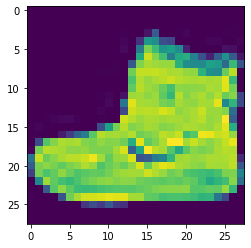

In [4]:
import matplotlib.pyplot as plt

index = 0

#plotting image corresponds to grid/matrix of pixel value at index
plt.imshow(training_images[index])

#label for matrix at index
print("Training label: ", training_labels[index])

#metrix
#print(training_images[index])

In [5]:
# normalizing data

training_images = training_images/255.0
test_images = test_images/255.0

In [6]:
INPUT_SHAPE = (28, 28)

#model architecture

#change the number of layers in the model, will increase depth therefore increase accuracy
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape = INPUT_SHAPE),
                             tf.keras.layers.Dense(128, activation = tf.nn.relu),
                             #tf.keras.layers.Dense(128, activation = tf.nn.relu),
                             tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

model.compile(
              optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
    )

In [7]:
# Summary method allows you to inspect the layers of the model 
        # and see the journey of the model through the convolution
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [8]:
#stop training when reached a desired value

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):   #logs contains lots of information about current training
    if(logs.get('accuracy') > 0.92):    #check for accuracy..... you can do same for loss (keyword:- 'loss')
      print("\n\nReached 92% accuracy!!!\n")
      self.model.stop_training = True

In [9]:
#training model

callbacks = myCallback() #instance of class myCallback
epoch = 15 #hyperparameter

history = model.fit(training_images, training_labels, epochs=epoch, callbacks=[callbacks])

Epoch 1/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4993 - accuracy: 0.8228
Epoch 2/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3728 - accuracy: 0.8666
Epoch 3/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3344 - accuracy: 0.8792
Epoch 4/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3121 - accuracy: 0.8858
Epoch 5/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2929 - accuracy: 0.8914
Epoch 6/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2785 - accuracy: 0.8963
Epoch 7/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2676 - accuracy: 0.9003
Epoch 8/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2569 - accuracy: 0.9046
Epoch 9/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2448 - accuracy: 0.9086
Epoch 10/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.238

In [10]:
#evaluating the model on test data

test_loss, test_acc = model.evaluate(test_images, test_labels)

#printing the loss and accuracy of trained model on test dataset
print("loss on test data: ", test_loss)
print('accuracy on test data: ', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3447 - accuracy: 0.8835
loss on test data:  0.3446957468986511
accuracy on test data:  0.8834999799728394


##PLOT loss and accuracy

In [11]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy'])


<Figure size 432x288 with 0 Axes>

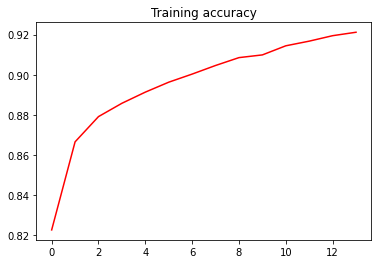

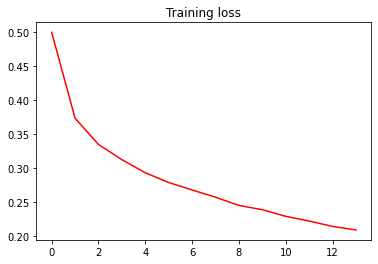

<Figure size 432x288 with 0 Axes>

In [12]:
%matplotlib inline

import matplotlib.image as mping
import matplotlib.pyplot as plt

acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

#plot training and validation accuracy per epoch
plt.plot(epochs, acc, 'r', label="Training accuracy")
plt.title('Training accuracy')
plt.figure()

#plot training and validation loss per epoch
plt.plot(epochs, loss, 'r', label="Training loss")
plt.title('Training loss')
plt.figure()